# Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
from tqdm import tqdm

# Mount path

In [17]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/Animals'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# List categories

In [18]:
categories = os.listdir(data_path)
print(categories)

['Jaguar', 'Leopard', 'Cheetah', 'Tiger', 'Lion']


# Image Loading and Preprocessing

In [19]:
train_data = []
for c in categories:
  path = os.path.join(data_path, c)
  print(path)
  class_index = categories.index(c)
  for img in os.listdir(path):
    try:
      img_arr = cv2.imread(os.path.join(path, img))
      img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
      img_arr = cv2.resize(img_arr, (256,256))
      print(type(img_arr), img_arr.shape)
      # plt.imshow(img_arr, cmap = 'gray')
      # break
      train_data.append([img_arr, class_index])
    except Exception as e:
      pass
    print(len(train_data))


/content/drive/MyDrive/Colab Notebooks/Animals/Jaguar
<class 'numpy.ndarray'> (256, 256)
1
<class 'numpy.ndarray'> (256, 256)
2
<class 'numpy.ndarray'> (256, 256)
3
<class 'numpy.ndarray'> (256, 256)
4
<class 'numpy.ndarray'> (256, 256)
5
<class 'numpy.ndarray'> (256, 256)
6
<class 'numpy.ndarray'> (256, 256)
7
<class 'numpy.ndarray'> (256, 256)
8
<class 'numpy.ndarray'> (256, 256)
9
<class 'numpy.ndarray'> (256, 256)
10
<class 'numpy.ndarray'> (256, 256)
11
<class 'numpy.ndarray'> (256, 256)
12
<class 'numpy.ndarray'> (256, 256)
13
<class 'numpy.ndarray'> (256, 256)
14
<class 'numpy.ndarray'> (256, 256)
15
<class 'numpy.ndarray'> (256, 256)
16
<class 'numpy.ndarray'> (256, 256)
17
<class 'numpy.ndarray'> (256, 256)
18
<class 'numpy.ndarray'> (256, 256)
19
<class 'numpy.ndarray'> (256, 256)
20
<class 'numpy.ndarray'> (256, 256)
21
<class 'numpy.ndarray'> (256, 256)
22
<class 'numpy.ndarray'> (256, 256)
23
<class 'numpy.ndarray'> (256, 256)
24
<class 'numpy.ndarray'> (256, 256)
25
<clas

In [20]:
random.shuffle(train_data)
for i in range(10):
  print(train_data[i])

[array([[ 67,  54,  46, ...,  48,  49,  54],
       [ 65,  53,  45, ...,  49,  47,  52],
       [ 63,  51,  44, ...,  49,  43,  47],
       ...,
       [132, 126, 116, ...,  67,  76,  82],
       [129, 130, 128, ...,  68,  80,  85],
       [128, 132, 135, ...,  69,  82,  88]], dtype=uint8), 1]
[array([[ 83,  88,  92, ...,  67,  65,  64],
       [ 93,  99, 100, ...,  73,  71,  70],
       [104, 111, 110, ...,  80,  77,  76],
       ...,
       [ 62,  61,  59, ...,  87,  80,  73],
       [ 66,  64,  62, ...,  97,  87,  79],
       [ 72,  70,  68, ..., 102,  92,  85]], dtype=uint8), 1]
[array([[157, 155, 116, ...,  54,  69,  62],
       [156, 149, 135, ...,  63,  59,  47],
       [119, 130, 123, ...,  67,  49,  53],
       ...,
       [ 34,  10,  14, ...,  32,  23,  14],
       [116,  21,  15, ...,  21,  50,  84],
       [183,  71,  20, ...,  11,  39,  78]], dtype=uint8), 0]
[array([[13,  7,  9, ..., 10, 10, 10],
       [ 7,  4,  8, ...,  9,  9,  9],
       [ 4,  6, 12, ...,  8,  8,  8],


# Showing all(170) images with labels

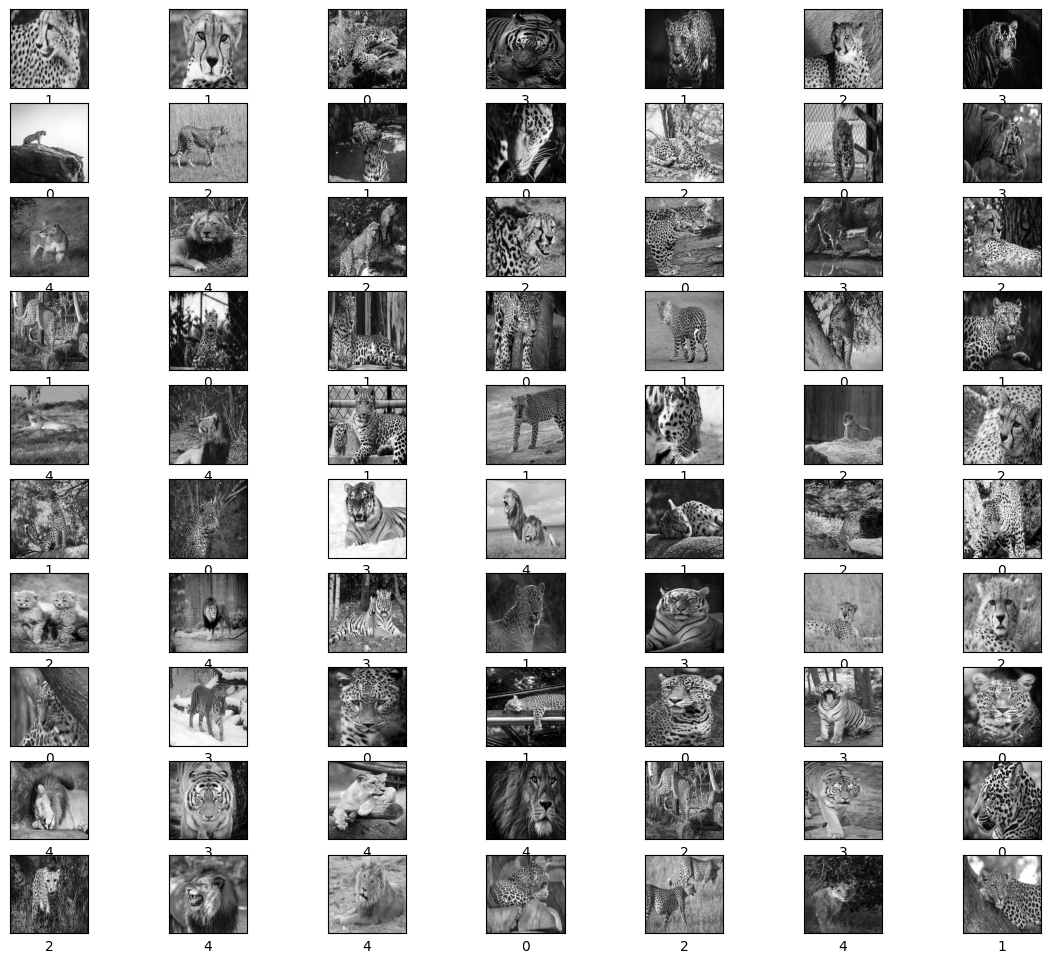

In [21]:
plt.figure(figsize = (14,12))
i=0
for r in range(10):
  for c in range(7):
    plt.subplot(10,7,i+1)
    plt.imshow(train_data[i][0], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_data[i][1])
    i+=1
plt.show()


# Showing Validation set of images(34) w/ labels

136 34
(34, 256, 256) (34,)


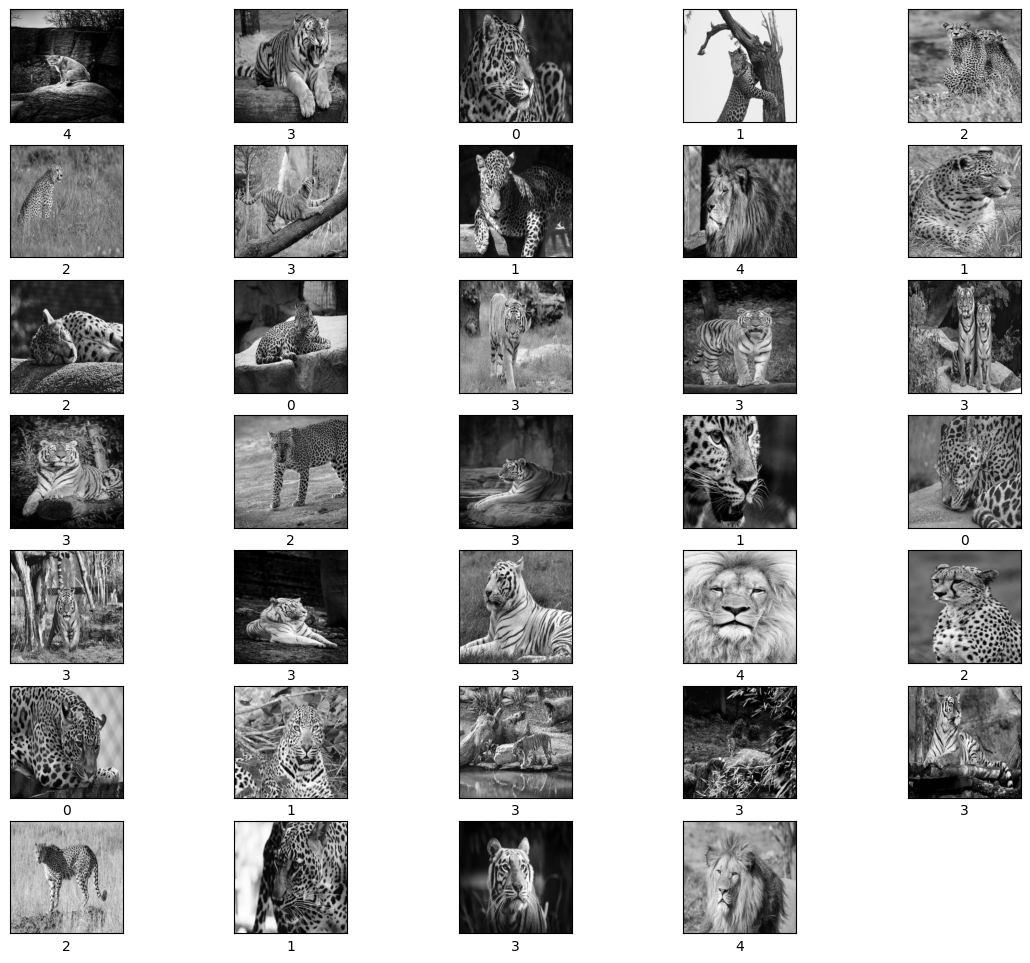

In [22]:
f1 = train_data[0:34]
f2 = train_data[34:68]
f3 = train_data[68:102]
f4 = train_data[102:136]
f5 = train_data[136:170]
train = f1+f2+f3+f4
valid = f5
print(len(train), len(valid))

valid_img = np.array([i[0] for i in valid])
valid_label = np.array([i[1] for i in valid])

print(valid_img.shape, valid_label.shape)

plt.figure(figsize = (14,12))
i=0
for r in range(valid_img.shape[0]):
  plt.subplot(7,5,i+1)
  plt.imshow(valid_img[i], cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(valid_label[r])
  i+=1
plt.show()


# 5-folds cross validation for KNN

In [23]:
X = np.array([i[0] for i in train_data])
y = np.array([i[1] for i in train_data])

# Split data into 5 folds
folds = [train_data[i:i + 34] for i in range(0, 170, 34)]
print("Fold sizes:", [len(f) for f in folds])


class KNearestNeighbor:
    def __init__(self, k=1):
        self.k = k

    def train(self, X, y):
        self.Xtr = X
        self.ytr = y

    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype=self.ytr.dtype)

        for i in range(num_test):
            distances = np.sqrt(np.sum((self.Xtr - X[i, :])**2, axis=(1, 2)))  # Euclidean distance (L2)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.ytr[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            Ypred[i] = unique_labels[np.argmax(counts)]

        return Ypred

fold_acc=[]
yPred = []

# Perform 5-fold cross-validation
def cross_validate_knn(train_data, k_values):
    avg_accuracies = []

    for k in k_values:
        fold_accuracies = []

        for i in range(5):
            # Validation and training data for this fold
            valid = folds[i]
            train = [item for j, fold in enumerate(folds) if j != i for item in fold]

            # Prepare training and validation images and labels
            train_img = np.array([r[0] for r in train])
            train_label = np.array([r[1] for r in train])
            valid_img = np.array([r[0] for r in valid])
            valid_label = np.array([r[1] for r in valid])

            knn = KNearestNeighbor(k=k)
            knn.train(train_img, train_label)
            y_pred = knn.predict(valid_img)
            yPred.append(y_pred)

            # Calculate accuracy
            # accuracy = accuracy_score(valid_label, y_pred)
            correct = np.sum(valid_label == y_pred)
            accuracy = correct / valid_label.shape[0]
            fold_accuracies.append(accuracy)

        # Storing the average accuracy for this value of k
        avg_accuracies.append(np.mean(fold_accuracies))
        print(f"k = {k}, fold accuracies: {list(np.round(fold_accuracies, 2))}, average accuracy: {np.round(np.mean(fold_accuracies),2)}")
        fold_acc.append(fold_accuracies)

    return avg_accuracies

# Running cross-validation from k (1 to 30)
k_values = list(range(1, 31))
avg_accuracies = cross_validate_knn(train_data, k_values)

Fold sizes: [34, 34, 34, 34, 34]
k = 1, fold accuracies: [0.24, 0.38, 0.26, 0.38, 0.38], average accuracy: 0.33
k = 2, fold accuracies: [0.29, 0.21, 0.12, 0.32, 0.29], average accuracy: 0.25
k = 3, fold accuracies: [0.26, 0.24, 0.21, 0.32, 0.21], average accuracy: 0.25
k = 4, fold accuracies: [0.32, 0.26, 0.26, 0.24, 0.26], average accuracy: 0.27
k = 5, fold accuracies: [0.38, 0.29, 0.24, 0.26, 0.32], average accuracy: 0.3
k = 6, fold accuracies: [0.29, 0.35, 0.15, 0.26, 0.26], average accuracy: 0.26
k = 7, fold accuracies: [0.32, 0.44, 0.24, 0.24, 0.26], average accuracy: 0.3
k = 8, fold accuracies: [0.32, 0.35, 0.21, 0.18, 0.24], average accuracy: 0.26
k = 9, fold accuracies: [0.32, 0.29, 0.18, 0.24, 0.26], average accuracy: 0.26
k = 10, fold accuracies: [0.32, 0.24, 0.15, 0.24, 0.26], average accuracy: 0.24
k = 11, fold accuracies: [0.29, 0.24, 0.24, 0.26, 0.26], average accuracy: 0.26
k = 12, fold accuracies: [0.18, 0.26, 0.26, 0.26, 0.32], average accuracy: 0.26
k = 13, fold accur

# Predictions of k(1 to 30) for 5-folds(34 each) [30*5]

In [24]:
yPred = np.array(yPred)
print(yPred)
print(yPred.shape)

[[3 2 4 ... 2 2 3]
 [4 1 1 ... 1 0 2]
 [0 2 3 ... 3 1 1]
 ...
 [0 2 3 ... 3 1 3]
 [4 0 2 ... 1 1 2]
 [3 4 2 ... 2 1 1]]
(150, 34)


In [25]:
fold_acc = np.array(fold_acc)
# print(fold_acc)
print(fold_acc.shape)


(30, 5)


# Plotting acccuracies of 5-folds Cross-Validation Accuracy for KNN

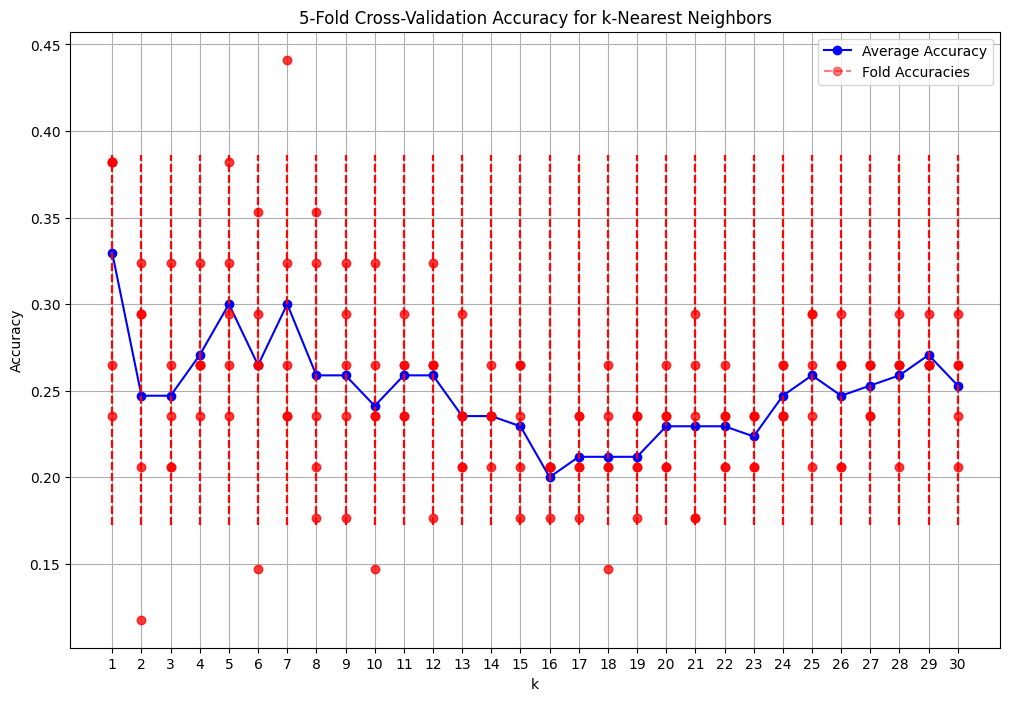

In [26]:
plt.figure(figsize=(12, 8))

# Plot the average accuracy for each k
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b', label="Average Accuracy")

# Plot each fold's accuracy as a red vertical line for each k
for i, k in enumerate(k_values):
    # fold_acc[i] contains accuracies for each fold at this k
    for acc in fold_acc[i]:
        plt.plot([k, k], [min(1000,acc), acc], marker='o', color='r', linestyle='--', alpha=0.5)  # Draw a vertical line segment for each fold
        plt.axvline(x=k, ymin=0.2, ymax=0.8, color='r', linestyle='--', alpha=0.5)  # Draw a vertical line for each k

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("5-Fold Cross-Validation Accuracy for k-Nearest Neighbors")
plt.xticks(k_values)
plt.legend(["Average Accuracy", "Fold Accuracies"], loc="best")
plt.grid()
plt.show()
